In [3]:
import cv2
from scipy import ndimage
import numpy as np
import os
import json

from src.src import *

# Path to directory with images
dataDir = os.path.join(".","images", '42')
auxiliaryDir = os.path.join("images", 'auxiliary_data')
def remove_color(img, target_color_bgr, tolerance=20, replacement_color_bgr=(0, 0, 0)):
    """
    Removes pixels of a specific color (within a tolerance) from an image
    using OpenCV and replaces them with another color (defaulting to transparent).

    Args:
        image_path (str): The path to the input image file.
        target_color_bgr (tuple): A BGR tuple (blue, green, red) representing the
                                color to remove (OpenCV uses BGR order).
        tolerance (int): The allowed difference (Euclidean distance in BGR space)
                        between a pixel's color and the target color for it to
                        be considered for removal. Higher values mean a wider
                        range of colors will be removed.
        replacement_color_bgr (tuple): A BGRA tuple (blue, green, red, alpha)
                                    representing the color to replace the removed
                                    pixels with. Defaults to transparent black.

    Returns:
        numpy.nparray or None: A new NumPy array representing the image with the
                            specified color removed, or None if the input
                            image cannot be opened.
    """
    try:
        if img is None:
            print(f"Error: Could not find the image at {img}")
            return None

        ## If the image doesn't have an alpha channel, add one (fully opaque)
        #if img.shape[-1] == 3:
        #    alpha = np.ones((img.shape[0], img.shape[1], 1), dtype=np.uint8) * 255
        #    img = cv2.cvtColor(img, cv2.COLOR_BGR2BGRA)
        #    img[:, :, 3] = alpha

        target_b, target_g, target_r = target_color_bgr
        replace_b, replace_g, replace_r = replacement_color_bgr

        height, width, channels = img.shape

        for y in range(height):
            for x in range(width):
                current_b, current_g, current_r = img[y, x]

                # Calculate the Euclidean distance in BGR space
                distance = np.sqrt((int(current_b) - target_b)**2 +
                                    (int(current_g) - target_g)**2 +
                                    (int(current_r) - target_r)**2)

                if distance <= tolerance:
                    img[y, x] = [replace_b, replace_g, replace_r]

        return img

    except Exception as e:
        print(f"An error occurred: {e}")
        return None
    
def remove_color_2(img, lower_bound, upper_bound, new_background = (0, 0, 0, 0)):
    """
    Removes pixels of a specific color (within a tolerance) from an image
    using OpenCV and replaces them with another color (defaulting to transparent).

    Args:
        image_path (str): The path to the input image file.
        lower_bound (tuple): A BGR tuple (blue, green, red) representing the
                                lower bound of the color range to remove.
        upper_bound (tuple): A BGR tuple (blue, green, red) representing the
                                upper bound of the color range to remove.

    Returns:
        numpy.nparray or None: A new NumPy array representing the image with the
                            specified color removed, or None if the input
                            image cannot be opened.
    """
    
    try:
        if img is None:
            print(f"Error: Could not open or find image at {img}")
            return None

        # Ensure image has an alpha channel
        if img.shape[-1] == 3:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2BGRA)

        mask = cv2.inRange(img[:, :, :3], lower_bound, upper_bound)
        mask_inv = cv2.bitwise_not(mask)

        # Create a transparent background layer
        background_layer  = np.zeros_like(img, dtype=np.uint8)
        background_layer[:] = new_background

        # Combine foreground and transparent background
        foreground = cv2.bitwise_and(img, img, mask=mask_inv)
        background = cv2.bitwise_and(background_layer, background_layer, mask=mask)
        final_image = cv2.bitwise_or(foreground, background)

        return final_image
    except Exception as e:
        print(f"An error occurred: {e}")
        return None


In [64]:
path =  os.path.join( auxiliaryDir , 'queen_white.png')

In [65]:
# Read image
imgs, gray_imgs, img_names = read_images([path])

# Show image
show_images(imgs, img_names)
show_images(gray_imgs, img_names)

In [71]:
#img = imgs[0]
img = processed_image

# Calculate the first derivatives of the image in x and y
sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)

# Show the images
cv2.imshow("Sobel X", sobel_x)
cv2.imshow("Sobel Y", sobel_y)
cv2.waitKey(0)
cv2.destroyAllWindows()

## white piece

In [64]:
replacement_transparent_bgra = (0, 0, 0) # Transparent black

In [65]:
target_brown_bgr = (78, 71, 71)  # Remember OpenCV uses BGR
tolerance_level = 70  # Adjust this value as needed


new_imagem = remove_color(imgs[0], target_brown_bgr, tolerance_level, replacement_transparent_bgra)

cv2.imshow("New Image", new_imagem)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [66]:
target_brown_bgr = (233, 236, 235)  # Remember OpenCV uses BGR
tolerance_level = 60 # Adjust this value as needed

new_new_imagem = remove_color(new_imagem, target_brown_bgr, tolerance_level, replacement_transparent_bgra)

cv2.imshow("New Image", new_new_imagem)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [67]:
target_brown_bgr = (172, 164, 159)  # Remember OpenCV uses BGR
tolerance_level = 60 # Adjust this value as needed

new_new_imagem = remove_color(new_imagem, target_brown_bgr, tolerance_level, replacement_transparent_bgra)

cv2.imshow("New Image", new_new_imagem)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
name = img_names[0] + "_transparent.png"
path = os.path.join(auxiliaryDir, name)
cv2.imwrite(path, new_new_imagem)


...

In [68]:
img = imgs[0]

# White range 
lower_blue = np.array([170, 170, 170])
upper_blue = np.array([255, 255, 255])

processed_image = remove_color_2( img, lower_blue, upper_blue)

# Brown range 
lower_blue = np.array([0, 0, 25])   # Example lower bound for brown
upper_blue = np.array([70, 90, 140])

processed_image = remove_color_2( processed_image, lower_blue, upper_blue)

## black piece

In [66]:
img = imgs[0]

# White range 
lower_blue = np.array([155, 155, 155])
upper_blue = np.array([255, 255, 255])

processed_image = remove_color_2( img, lower_blue, upper_blue)

# Brown range 
lower_blue = np.array([0, 0, 45])   # Example lower bound for brown
upper_blue = np.array([90, 110, 160])

processed_image = remove_color_2( processed_image, lower_blue, upper_blue)

In [69]:
cv2.imshow("Processed Image", processed_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [70]:
name = img_names[0] + "_transparent.png"
path = os.path.join(auxiliaryDir, name)
cv2.imwrite(path, processed_image)


True

sssss

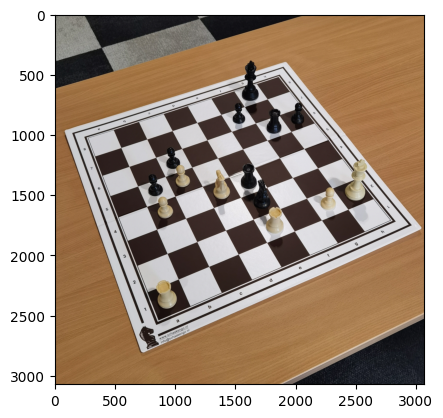

In [83]:
query_dataDir = 'images'
query_image = cv2.imread(os.path.join(query_dataDir, 'G000_IMG062.jpg')) # Change this, according to your image's path
query_rgb = cv2.cvtColor(query_image, cv2.COLOR_BGR2RGB)

train_dataDir = os.path.join("images", 'auxiliary_data', 'transparent')
train_image = cv2.imread(os.path.join(train_dataDir, 'queen_white_transparent.png')) # Change this, according to your image's path
train_rgb = cv2.cvtColor(train_image, cv2.COLOR_BGR2RGB)

from matplotlib import pyplot as plt
plt.imshow(query_rgb)


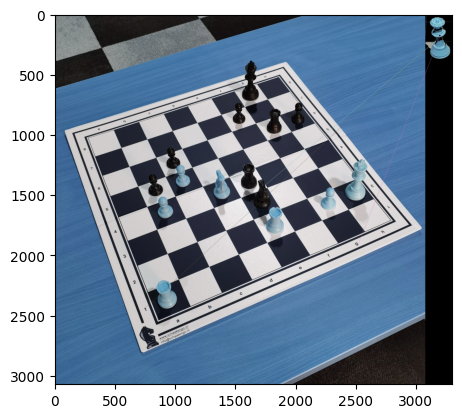

In [93]:
# Initiate ORB detector
orb = cv2.ORB_create()

# Find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(query_image, None)
kp2, des2 = orb.detectAndCompute(train_image, None)


# Create a Brute Force Matcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=False)

# Match descriptors
matches = bf.knnMatch(des1, des2, k=2)

# Apply ratio test
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:  # Adjust the ratio as needed
        good_matches.append([m])

# Draw matches
match_output = cv2.drawMatchesKnn(query_image, kp1, train_image, kp2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)


plt.imshow(match_output)